In [26]:
import sys
import os
import numpy as np
from numpy.linalg import norm

from numba import jit
import matplotlib.pyplot as plt

plt.style.use('ggplot')

(7, 2)
vals  [0.2 0.3]
vals  [-0.2 -0.1  0. ]
vals  [0.4 0.6]
[[-0.2  0.3]
 [-0.3  0.2]]
[[-0.9 -0.2]
 [-1.  -0.1]
 [-1.1  0. ]]
[[0.6 0.4]
 [0.4 0.6]]
[0. 1. 2. 1. 2. 0. 1.]
x [-0.25 -1.    0.5 ]
y [ 0.25 -0.1   0.5 ]


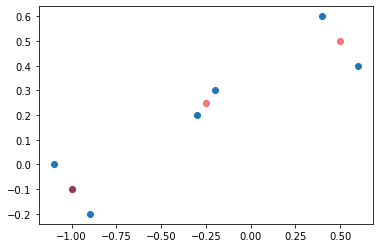

In [4]:
#!/usr/bin/env python3
"""
George Gannon
kmeans.py

kmeansly does some stuff
"""

class KMeans:
    def __init__(self, num_clusters, intrain_data, inval_data):
        self.NUM_CLUSTERS = num_clusters
        self.training_data = intrain_data
        self.validation_data = inval_data
        self.cluster_values = np.empty([ self.training_data.shape[0]]) # will be a numpy array of integers representing training_data[i]'s self.clusters index.
        self.centroids = np.zeros( (self.NUM_CLUSTERS, self.training_data.shape[-1]))
        self.cluster_category = np.empty([self.NUM_CLUSTERS])
        
    def initialize_centroids(self):
        for i in range(self.NUM_CLUSTERS):
            self.centroids[i] = self.training_data[i]
                  
    def calculate_new_centroids(self):
        for i in range(self.NUM_CLUSTERS):
            cluster_indices = np.where(self.cluster_values==i)
            newpt = np.sum(self.training_data[cluster_indices], axis=0)/len(self.training_data[cluster_indices])
            self.centroids[i] = newpt
    
    def majority_vote(self):
        for i in range(self.NUM_CLUSTERS):
            cluster_indices = np.where(self.cluster_values==i)
            vals, cts=np.unique(self.training_data[cluster_indices][:,-1], return_counts=True)
            print("vals ",vals)

    
                    
def calculate_cluster_ownership(training_data, centroids, cluster_values):
    # A few parts stolen from my github: https://github.com/GeorgeG518/MTSU-CSCI-4600-Summer-2022/blob/6c6cefe2028584a4a5e94f5027fb5efe62d75b2b/Module2/pythontiming.ipynb
    for i,each in enumerate(training_data):
        MIN_DIST = 1.7976931348623157e+308 # kinda big
        for j, cent in enumerate(centroids):
            
            distance = norm(each-cent, 2)
            if MIN_DIST > distance: # our distance is smaller
                MIN_DIST = distance
                cluster_values[i]=j
                
def test(kmeans):
    for each in kmeans.validation_data:
        pass

if __name__=='__main__':

    
    num_clusters = 3
    intrain_name = "shuftoydata.txt"
    inval_name= "toydata.txt"
    intrain_data = np.loadtxt(intrain_name)
    inval_data = np.loadtxt(inval_name)
    print(intrain_data.shape)
    kmeans = KMeans(num_clusters, intrain_data, inval_data)
    kmeans.initialize_centroids()
    converged = False
    
    while not converged:
        prev_iter = np.copy(kmeans.cluster_values)
        calculate_cluster_ownership(kmeans.training_data, kmeans.centroids, kmeans.cluster_values)
        curr_iter_cluster_membership = kmeans.cluster_values
        kmeans.calculate_new_centroids()
        
        if prev_iter.all() == curr_iter_cluster_membership.all():
            converged=True
            
    kmeans.majority_vote()
    for i in range(kmeans.NUM_CLUSTERS):
        cluster_indices = np.where(kmeans.cluster_values==i)
        print(kmeans.training_data[cluster_indices])
    print(kmeans.cluster_values)
    x = kmeans.centroids[:,0]
    print('x',x)
    y=kmeans.centroids[:,1]
    print('y',y)

    plt.scatter(kmeans.training_data[:,0],kmeans.training_data[:,1])
    plt.scatter(x, y, alpha=0.5, c='red')
    plt.savefig('kmeans.jpg')
    plt.show()


# Parsing Data

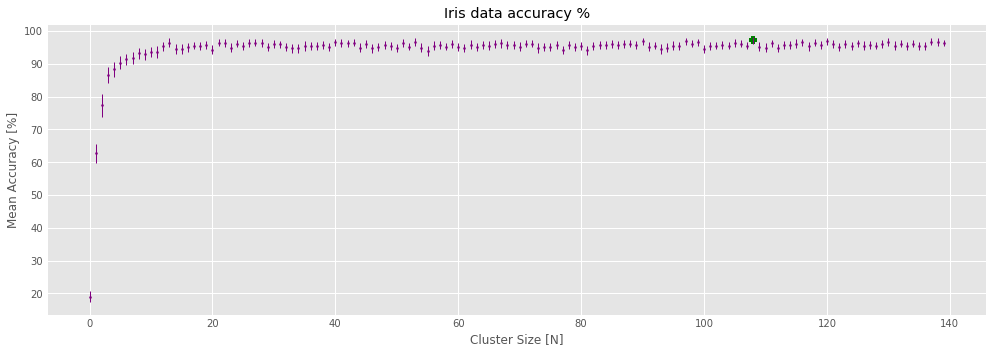

In [28]:
# Iris Data
IRIS_XDATA=np.arange(0, 140,1)
IRIS_YDATA=np.empty([140])
iris_stderr_data = np.zeros([140]) # borrowed from old notebook
IRIS_XMAX=0
IRIS_YMAX=0
for i in range(140):
    arr= np.loadtxt("./iris/iris_"+str(i+1)+".dat")
    IRIS_YDATA[i]=np.mean(arr)*10
    iris_stderr_data[i] = (np.std(arr) / np.sqrt(len(arr)) )*10
    if IRIS_YDATA[i]>IRIS_YMAX:
        IRIS_YMAX = IRIS_YDATA[i]
        IRIS_XMAX=i   
plt.figure(figsize=(15,5))
plt.errorbar(IRIS_XDATA, IRIS_YDATA,yerr=1.96*iris_stderr_data, alpha=1 ,c='purple',elinewidth=1,linestyle='None')
plt.scatter(IRIS_XDATA, IRIS_YDATA, s=4, alpha=1 ,c='purple')
plt.scatter(IRIS_XMAX, IRIS_YMAX, alpha=1, s=50, c='green', marker='+')
plt.title('Iris data accuracy %', c='black')
plt.xlabel("Cluster Size [N]")
plt.ylabel("Mean Accuracy [%]")
plt.savefig("iris.jpg",bbox_inches='tight')
plt.show()    


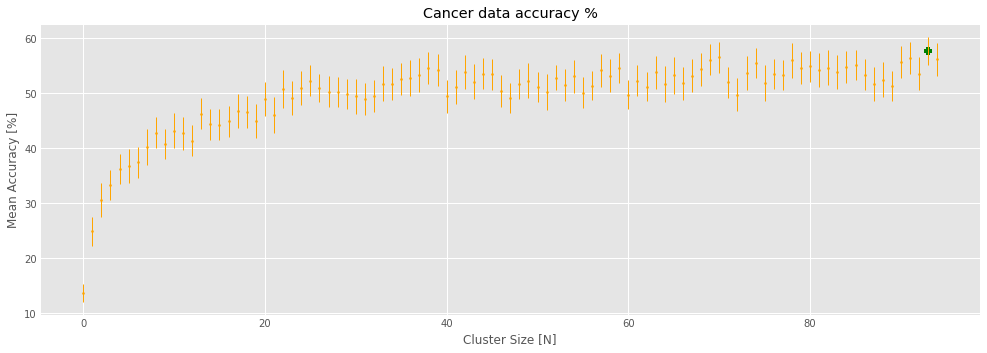

In [29]:
# CANCER Data
CANCER_XDATA=np.arange(0, 95,1)
CANCER_YDATA=np.empty([95])
cancer_stderr_data = np.zeros([95]) # borrowed from old notebook
CANCER_XMAX=0
CANCER_YMAX=0
for i in range(95):
    arr= np.loadtxt("./cancer/cancer_"+str(i+1)+".dat")
    CANCER_YDATA[i]=np.mean(arr)*10
    cancer_stderr_data[i] = (np.std(arr) / np.sqrt(len(arr)) )*10
    if CANCER_YDATA[i]>CANCER_YMAX:
        CANCER_YMAX = CANCER_YDATA[i]
        CANCER_XMAX=i
        
 ## Make the plot bigger to get a better resolution
plt.figure(figsize=(15,5))
plt.errorbar(CANCER_XDATA, CANCER_YDATA,yerr=1.96*cancer_stderr_data, alpha=1 ,c='orange',linewidth=1,linestyle='None')   
plt.scatter(CANCER_XDATA, CANCER_YDATA, alpha=1, s=4,c='orange')
plt.scatter(CANCER_XMAX, CANCER_YMAX, alpha=1, s=50,c='green', marker='+')
plt.title('Cancer data accuracy %', c='black')
plt.xlabel("Cluster Size [N]")
plt.ylabel("Mean Accuracy [%]")
plt.savefig("cancer.jpg",bbox_inches='tight')
plt.show()    
